In [1]:
from utility_dfcutter import *

In [3]:
selection,nbjet,njet = 'mutau','==0','>=2'
mctt = DFCutter(selection,nbjet=nbjet,name='mctt',njet=njet).getDataFrame(variation="")
mct  = DFCutter(selection,nbjet=nbjet,name='mct',njet=njet).getDataFrame(variation="")
mcw  = DFCutter(selection,nbjet=nbjet,name='mcw',njet=njet).getDataFrame(variation="")
mcz  = DFCutter(selection,nbjet=nbjet,name='mcz',njet=njet).getDataFrame(variation="")
mcvv = DFCutter(selection,nbjet=nbjet,name='mcdiboson',njet=njet).getDataFrame(variation="")
data = DFCutter(selection,nbjet=nbjet,name="data2016", njet=njet).getDataFrame(variation="")


# for df in [mcvv,mcz,mcw,mct,mctt,data]:
#     df['tauPuppiChHadIsoRel'] = df.tauPuppiChHadIso/df.tauPt
#     df['tauPuppiGammaIsoRel'] = df.tauPuppiGammaIso/df.tauPt
#     df['tauPuppiNeuHadIsoRel'] = df.tauPuppiNeuHadIso/df.tauPt


    
mc   = pd.concat([mcvv,mcz,mcw,mct,mctt],ignore_index=True,sort=False)

In [30]:
if selection in ['mutau','etau']:  
    names = ["data2016","mcdiboson","mcdy","mct","mctt"]

    fakes = pd.DataFrame()
    for name in names:
        temp =  DFCutter(selection+'_fakes',nbjet,name,njet).getDataFrame('')
        if not name == 'data2016':
            temp.eventWeight = -1*temp.eventWeight
        fakes = fakes.append(temp,ignore_index=True, sort=False)

# 1. Make data MC plots

In [8]:
from utility_dfplotter import *

def processBreakdown():
    dfList = [mcvv,mcz,mcw,mct,mctt,data]

    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   ['VV',"Z","W","tW","tt","data"], 
                   ["#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_process.png'.format(selection,v),dpi=300)

def flavorBreakdown():
    fq = mc.query('tauGenFlavor<4 and tauGenFlavor>0')
    fc = mc.query('tauGenFlavor==4')   
    fb = mc.query('tauGenFlavor==5')   
    fg = mc.query('tauGenFlavor==21')  
    ftau = mc.query('tauGenFlavor==15')  
    fnan = mc.query('tauGenFlavor==26 or tauGenFlavor==0')

    dfList = [fnan,fg,fq,fc,fb,ftau, data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl ,
                   ['untag', r"$g \rightarrow \tau_h$",
                    r"$q \rightarrow \tau_h$",
                    r"$c \rightarrow \tau_h$",r"$b \rightarrow \tau_h$",
                    r"$\tau_h\rightarrow \tau_h$","data"], 
                    #["C0","C1", "C2", "C3", "C4", "C5",'k'])
                   ["#a32020","#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_flavor.png'.format(selection,v),dpi=300)

def decaymodeBreakdown():
    d1 = mc.query('tauDecayMode==0')
    d2 = mc.query('tauDecayMode==1')   
    d3 = mc.query('tauDecayMode==10')   

    dfList = [d1,d2,d3,data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   [r"$\tau_h \rightarrow h^+$",
                    r"$\tau_h \rightarrow h^+h^0$",
                    r"$\tau_h \rightarrow h^+h^+h^-$",
                    "data"], 
                    ["C0","C1", "C2",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_decaymode.png'.format(selection,v),dpi=300)

In [5]:
# v,a,b,step,xl = 'tauPt',15,81,5,r'$p^T_\tau$ [GeV]'
# v,a,b,step,xl = 'nBJets',0,5,1,r'$n_b$'
# v,a,b,step,xl = 'nJets',0,5,1,r'$n_j$'
# v,a,b,step,xl = 'dilepton_mass',10,241,10,r'$m_{ll}$ [GeV]'
# v,a,b,step,xl = 'tauPuppiChHadIsoRel',-0.05,1.5,0.1, r'$ISO^{ch}_\tau$'
# v,a,b,step,xl = 'tauPuppiGammaIsoRel',-0.05,1.5,0.1, r'$ISO^{\gamma}_\tau$'
# v,a,b,step,xl = 'tauPuppiNeuHadIsoRel',-0.05,1.5,0.1, r'$ISO^{nh}_\tau$'
v,a,b,step,xl = 'lepton2_pt',15,141,5,r'$p^T_\tau$ [GeV]'

processBreakdown()
flavorBreakdown()
decaymodeBreakdown()

# backup

In [32]:
from utility_dfplotter import *

def processBreakdown():
    dfList = [fakes,mcvv,mcz,mcw,mct,mctt,data]

    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   ['QCD','VV',"Z","W","tW","tt","data"], 
                   ['grey',"#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}0_process.png'.format(selection,v),dpi=300)

def flavorBreakdown():
    fq = mc.query('tauGenFlavor<4 and tauGenFlavor>0')
    fc = mc.query('tauGenFlavor==4')   
    fb = mc.query('tauGenFlavor==5')   
    fg = mc.query('tauGenFlavor==21')  
    ftau = mc.query('tauGenFlavor==15')  
    fnan = mc.query('tauGenFlavor==26 or tauGenFlavor==0')

    dfList = [fakes,fnan,fg,fq,fc,fb,ftau, data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl ,
                   ['QCD','untag', r"$g \rightarrow \tau_h$",
                    r"$q \rightarrow \tau_h$",
                    r"$c \rightarrow \tau_h$",r"$b \rightarrow \tau_h$",
                    r"$\tau_h\rightarrow \tau_h$","data"], 
                    #["C0","C1", "C2", "C3", "C4", "C5",'k'])
                   ['grey',"#a32020","#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}0_flavor.png'.format(selection,v),dpi=300)

def decaymodeBreakdown():
    d1 = mc.query('tauDecayMode==0')
    d2 = mc.query('tauDecayMode==1')   
    d3 = mc.query('tauDecayMode==10')   

    dfList = [fakes,d1,d2,d3,data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   ['QCD',r"$\tau_h \rightarrow h^+$",
                    r"$\tau_h \rightarrow h^+h^0$",
                    r"$\tau_h \rightarrow h^+h^+h^-$",
                    "data"], 
                    ['grey',"C0","C1", "C2",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}0_decaymode.png'.format(selection,v),dpi=300)

# plot signal region

In [38]:
selection,nbjet,njet = 'mutau','==0','>=2'
temp = DFCutter(selection,nbjet=nbjet,name='mcz',njet=njet).getDataFrame(variation="")

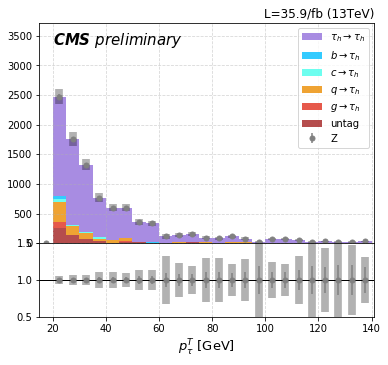

In [39]:
from utility_dfplotter import *

#temp = temp.query('genCategory==16')
fq = temp.query('tauGenFlavor<4 and tauGenFlavor>0')
fc = temp.query('tauGenFlavor==4')   
fb = temp.query('tauGenFlavor==5')   
fg = temp.query('tauGenFlavor==21')  
ftau = temp.query('tauGenFlavor==15')  
fnan = temp.query('tauGenFlavor==26 or tauGenFlavor==0')

dfList = [fnan,fg,fq,fc,fb,ftau,temp]

v,a,b,step,xl = 'lepton2_pt',15,141,5,r'$p^T_\tau$ [GeV]'

sk = ASingleKinematicPlot(v,a,b,step,dfList)
sk.settingPlot(xl ,
               ['untag', r"$g \rightarrow \tau_h$",
                r"$q \rightarrow \tau_h$",
                r"$c \rightarrow \tau_h$",r"$b \rightarrow \tau_h$",
                r"$\tau_h\rightarrow \tau_h$","Z"], 
                #["C0","C1", "C2", "C3", "C4", "C5",'k'])
               ["#a32020","#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'gray'])
sk.makePlot()
plt.savefig('../../plots/misid/{}/{}0_z.png'.format(selection,v),dpi=300)